#### This file is my understanding of both manual step-by-step simple linear regression and with using using `LinearRegression().fit()` method from `scipy` 

***

- It is completely done by myself without any external help. 

- This is just my approval to myself that I have figured it out, nothing more. 


### Manual step by step linear regression and parameters optimization:  
 

> minimizing the sum squared errors`(SSE)`

> parameters optimization `(b0 - intercept and b1-input variable)`

### **Goal is to predict weight(y) from height(x) with `linear regression`**

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import norm

# first the dataset (This is just example so i will make it very simple)

metric = pd.DataFrame({
    'Weight':[5,10,12,17,18],
    'Heights':[30,62,70,100,109]
})
metric

In [ ]:
# defining the function that will calculate residual , and later on the goal is to minimize the residual.

def sse_handling(parameters):
    beta_0 = parameters[0]
    beta_1 = parameters[1]
    # predicted data will be (Y^)- because we predict the weight FROM height. Here Y_hat represents unoptimized weight value
    y_hat = beta_0 + beta_1*metric['Heights']
    # defining the residual - it's Y(actual) - Y(^hat)
    residual = metric['Weight'] - y_hat 
    #square it
    residual = residual**2
    #sum
    residual = residual.sum()
    #out
    return residual

parameters = [100,222]
print(sse_handling(parameters))

Now minimize the sse and get the most optimal b0 and b1 values

- First initialize the random parameters -> to data frame also.

- After making data frame, make the iteration of each row for column 1 and column 2 (bo1 and bo2)

In [ ]:
rng = np.random.default_rng(seed=1013)

init_b0 = rng.uniform(low = -100,high=100,size=100)
init_b1 = rng.uniform(low= -100, high= 100, size=100)
random_pars = pd.DataFrame({
    'init_b0':init_b0,
    'init_b1':init_b1
}
)
random_pars

In [ ]:
# i need to store these random parameters in some list that will be passed to lg_sse function
sse = []
for i in range(random_pars.shape[0]):
    pars = [random_pars['init_b0'][i],random_pars['init_b1'][i]]
    sse_value = sse_handling(pars)
    sse.append(sse_value)
random_pars['SSE'] = sse
random_pars.sort_values(ascending=True,inplace=True,by='SSE',ignore_index=True)

# ascending= True means that first pair of b0 and b1 is the smalles.

random_pars

# here we have a loop going through rows of columns init_bo and init_b1
# they are stored in the empty list which is then appended to data frame random_pars





In [ ]:
# With sort_values(... Ascending = True..), the first value for init_b0 and init_b1 will be the least one. 
# it is choosen with [0]

best_pair = random_pars.iloc[0][['init_b0','init_b1']].values

best_pair

#### Method will be `Nelder-Mead`.

In [ ]:
from scipy import optimize

optimized_model = optimize.minimize(
    fun=sse_handling,
    x0=best_pair,
    method='Nelder-Mead'
)

print(f"Best values for b0 is {best_pair[0]} and best value for b1 is {best_pair[1]}")

Above I had problem with `x0`. 

It is required that x0 has only one dimension. 

- check shape of init_b0 and init_b1.

### best values have been found for `b0` and `b1`

- use these values to make a prediction of weight from height

In [ ]:
optimized_model.x

In [ ]:
best_b0, best_b1 = optimized_model.x

In [ ]:
pred_weight = best_b0 + best_b1*metric['Heights']
pred_weight= pd.DataFrame(pred_weight).rename(columns={'Heights':'Predicted_Weight'})
pred_weight['Height'] = metric['Heights']
pred_weight

In [ ]:
type(metric)



In [ ]:
import seaborn as sns

sns.scatterplot(data=metric,x='Heights',y='Weight',label='Actual')
sns.lineplot(data=pred_weight, y='Predicted_Weight',x=metric['Heights'],color='red', label='Predicted Weight')




***

### Now with `linear_regression()`

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
metric

In [ ]:
# My Data
metric_1 = metric

linear_model = smf.ols(formula='Weight ~ Heights', data=metric).fit()
linear_model.summary()

### with fit(), my model already has the best values for b0 `intercept` and b1 `input (heights)` in this case.

In [ ]:
linear_model.params

#Output:

#Intercept   -0.068155 - b0
#Heights      0.168034 - b1
#dtype: float64

In [ ]:
metric_1['Predicted Weight'] = linear_model.predict()
metric_1['Residuals'] = linear_model.resid
metric_1

### Plot with `regplot` and `scatterplot`:

In [ ]:
sns.regplot(data=metric_1,x='Weight',y='Heights',ci=0,line_kws={'color':'red'})
sns.scatterplot(data=metric_1,x='Predicted Weight')
sns.despine(top=True,right=True,offset=10)

In [ ]:
# - Pearson's correlation (R-value) coefficient and R^2
print(f"Pearson's coefficient of determination is R^2{round(linear_model.rsquared,4)}")
print(f"Pearson's coefficient of correlation R-value is {round(np.sqrt(linear_model.rsquared),4)}")

Pearson's coefficient of `correlation` (R-value) explain linear relatedness of our variables. It measures strenght and relationship betweem them, while 

Pearson's coefficient of `determination` (R^2) tells us how much of the variability in Y is explained by X in a linear regression model.

- Interpretation of R^2:

> R^2 = 1 (100%) - model explains perfect fit

> R^2 = 0.25 (25%) - X explains only 25% of Y, meaning there are other factors affecting `Y`. 25% of the variance is explained by the `X`.


In [ ]:
linear_model.pvalues

# Output:

#Intercept    0.883549 >p - not statistically significant
#Heights      0.000072 < 0.05 - Statistically significat!
#dtype: float64

In [ ]:
linear_model.params

#Output:

#Intercept   -0.068155
#Heights      0.168034
#dtype: float64





In [ ]:
# new data prediction based on the first fish_data data frame
import os
data_dir = os.path.join(os.getcwd(),'_data')
print(data_dir)

fish_data = pd.read_csv('_data\\fish.csv')
fish_data
model_frame = fish_data[['Height','Weight']]
model_frame

# - sampling the new data from the normal distribution with the mean and std parameters taken from the original data
# this serves as random parameters
predict_data = pd.DataFrame(columns=['Heights'])
predict_data['Heights'] = rng.normal(loc=model_frame['Height'].mean(),scale =model_frame['Height'].std(),size=10)
predict_data

# - clipping the negative values 
predict_data = np.clip(a_min=0,a_max=np.inf, a=predict_data)

predicted_weight = linear_model.predict(predict_data['Heights'])
predict_data['Predicted_Weight'] = predicted_weight
predict_data

linear_model.params
linear_model.pvalues

# Height is statistically significant to predict weight in this example (p<0.05)

### Ploting these predictions

In [ ]:
model_frame



In [ ]:
sns.scatterplot(data=model_frame,x='Height',y='Weight',color='red')
sns.lineplot(data=predict_data,y='Predicted_Weight',x=model_frame['Height'])



Here we can see that predicted weight (blue line) is away from scatter data. I expected this because the 'predicted_data' has been chosen as a random sampling parameters.  

Anyway, using Pearson's coefficient of determination we can check how well model explains the variance in Y by X.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(model_frame['Weight'],model_frame['Height'])
r2

# -1.1732692703241785 :/



In [ ]:
predict_data.dropna(inplace=True)

In [233]:
predict_data

,Heights,Predicted_Weight,Residual
0,8.967512,1.438696,0.027122
1,7.260184,1.151806,-0.349980
2,13.136837,2.139286,0.305745
3,15.086334,2.466869,0.264712
4,0.000000,-0.068155,-0.247598


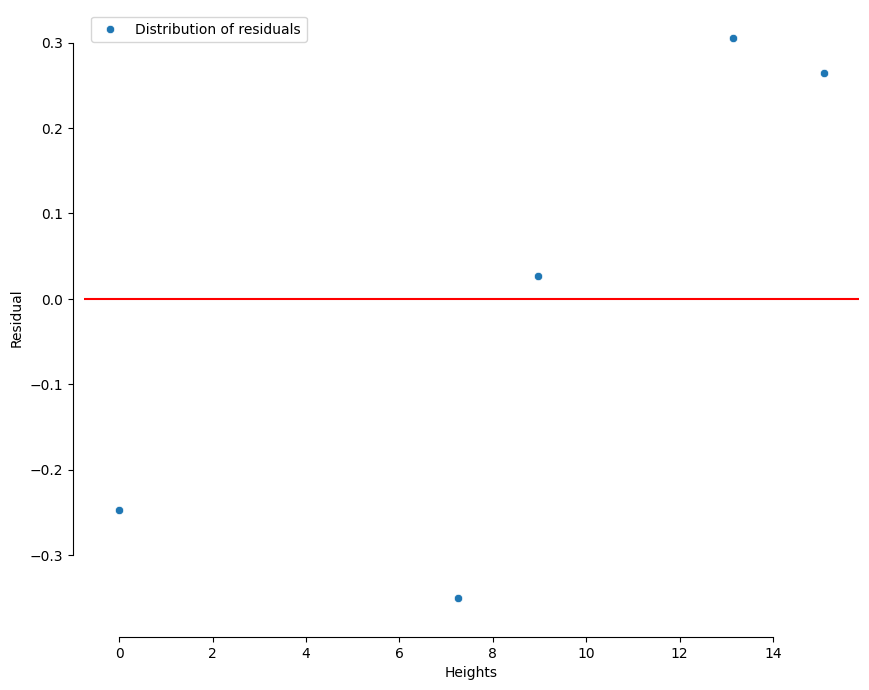

In [238]:
# Just wanted to see something, ignore :D

linear_model.resid

residual = linear_model.resid
predict_data['Residual'] = residual


# plot the distribution of residual

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.scatterplot(data=predict_data,x='Heights',y='Residual',label='Distribution of residuals')
sns.despine(offset=8,trim=True)
plt.axhline(y=0, c='r')
plt.show()